# Premier League 2019/2020 analyst and machine learning project
This is an analyst of Premier League 2019/20 season.

1. EDA(Dataset check, heatmaps),
2. Efficiency of blind betting,
3. Tax analysis,
4. Blind betting over 2.5 + summary,
5. Blind betting under 2.5 + summary,
6. Quick check how correct were bookmakers,
7. Prepraing and spliting data,
8. Checking LazyPredict and Optuna,
9. CV + training model,
10. Plots + checking performance of model.

In [1]:
# Importing necessary packages.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import lazypredict
from lazypredict.Supervised import LazyClassifier

import optuna
from optuna.samplers import RandomSampler

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import RFECV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import sklearn.model_selection 

C:\Users\bisok\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Exploratory data analysis

In [2]:
#loading data
data = pd.read_csv('E0.csv')
#data check
data.sample(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
336,E0,08/07/2020,20:15,Brighton,Liverpool,1,3,A,1,2,...,1.90,1.00,1.81,2.09,1.80,2.14,1.89,2.17,1.83,2.06
96,E0,27/10/2019,14:00,Newcastle,Wolves,1,1,D,1,0,...,1.55,0.25,1.89,2.04,1.89,2.05,1.90,2.25,1.86,2.03
307,E0,25/06/2020,18:00,Burnley,Watford,1,0,H,0,0,...,1.54,0.25,2.03,1.87,2.05,1.88,2.07,1.95,1.99,1.89
38,E0,01/09/2019,14:00,Everton,Wolves,3,2,H,2,1,...,1.63,-0.50,2.02,1.77,2.08,1.85,2.11,1.86,2.07,1.82
273,E0,29/02/2020,15:00,Newcastle,Burnley,0,0,D,0,0,...,1.76,0.00,1.97,1.96,1.95,1.98,2.00,2.00,1.93,1.94


Columns:
FTHG - Full time home team goal
FTAG - Full time away team goal
B365>2.5 - odd less than 3 goals
B365<2.5 - odd more than 3 goals

In [3]:
#choose columns to use
df = data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'B365>2.5', 'B365<2.5']]
#check data types, shape
df.info()
#data check
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  380 non-null    object 
 1   AwayTeam  380 non-null    object 
 2   FTHG      380 non-null    int64  
 3   FTAG      380 non-null    int64  
 4   B365>2.5  380 non-null    float64
 5   B365<2.5  380 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 17.9+ KB


,HomeTeam,AwayTeam,FTHG,FTAG,B365>2.5,B365<2.5
135,Southampton,Watford,2,1,1.90,1.90
286,Man United,Man City,2,0,1.66,2.20
117,Man United,Brighton,3,1,2.00,1.80


In [4]:
#check null values in data
df.isnull().sum()

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
B365>2.5    0
B365<2.5    0
dtype: int64

In [5]:
#count of results
data['FTR'].value_counts()

H    172
A    116
D     92
Name: FTR, dtype: int64

Text(0.5, 1.0, 'Matches results')

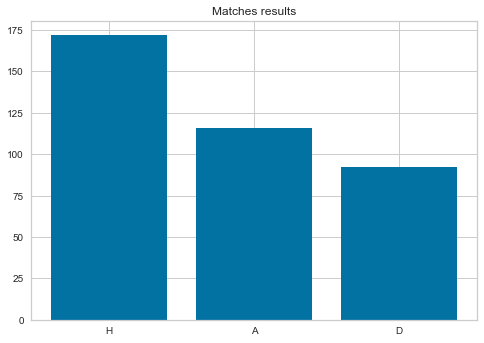

In [6]:
#FTR visualization
y = data['FTR'].value_counts()
x = ["H", "A", "D"]
plt.bar(height = y, x = x) 
plt.title("Matches results")

H - Home Team won
A - Away Team won
D - Draw

# Heatmaps 
## Correlation analisys


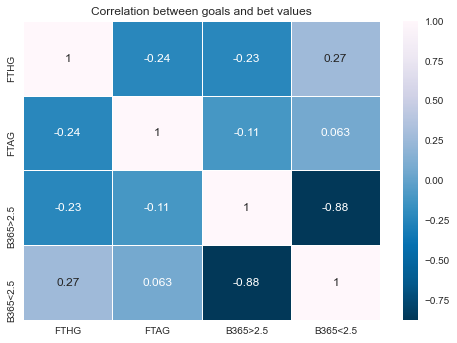

In [7]:
hm_1 = data[["HTR", "FTR", "HTHG" , "HTAG", "AS", "HS", "B365H", "B365D", "B365A"]]
hm_1['FTR'] = hm_1['FTR'].replace(['H','D', 'A'],['1','0','2']).astype(int)
hm_1['HTR'] = hm_1['HTR'].replace(['H','D', 'A'],['1','0','2']).astype(int)

hm_1_corr = df.corr()

ax = plt.axes()
sns.heatmap(hm_1_corr, ax = ax, annot= True, linewidth = 0.5, cmap = "PuBu_r")

ax.set_title('Correlation between goals and bet values')
plt.show()

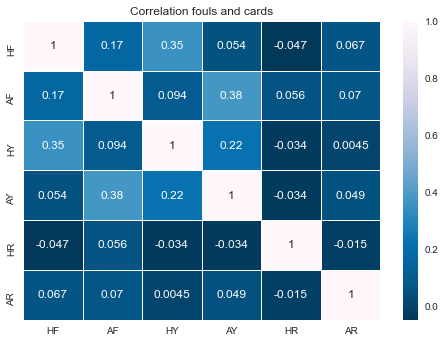

In [8]:
hm_2 = data[["HF", "AF", "HY", "AY", "HR", "AR"]]
hm_2_corr = hm_2.corr()

ax = plt.axes()
sns.heatmap(hm_2_corr, ax = ax, annot= True, linewidth = 0.5, cmap = "PuBu_r")

ax.set_title('Correlation fouls and cards')
plt.show()

# Conclusion:

As we can see at a first heatmap, there is a strong corelation between expected amount of goals by betting sites and goals in match. We can also see that more important are goals scored by a home team, as there is more of them.

At a second heatmap we can see a corellation between fouls and yellow cards, but what is surprising, there is not a correlation between fouls and red cards, what mean that they are usually shown for urgent fouls, not as a consequence of an amount of fouls.

# Efficiency of blind betting

In [9]:
def add_columns_values(d, c, f, s):
    '''Function to sum 2 columns value and create new column with result
     d = dataframe name
     c = new column name
     f = first column to sum
     s = second column to sum'''
    d[c] = d[f] + d[s]
    return d

In [10]:
#sum 2 columns value and create new column with result
add_columns_values(df, "total_goals", "FTHG", "FTAG")
#data check
df.sample(5)


,HomeTeam,AwayTeam,FTHG,FTAG,B365>2.5,B365<2.5,total_goals
326,Newcastle,West Ham,2,2,2.00,1.80,4
60,Sheffield United,Liverpool,0,1,1.61,2.30,1
174,Newcastle,Crystal Palace,1,0,2.50,1.53,1
339,Aston Villa,Man United,0,3,1.66,2.20,3
376,Man City,Norwich,5,0,1.22,4.33,5


In [11]:
def add_column_less_3(d, n, c):
    '''Function to add new column with True if value is lower than 3
    d = dataframe name
    n = new column name
    c = column to check'''
    d[n] = d[c] < 3
    return d

In [12]:
#add new column with True if value is lower than 3
add_column_less_3(df, 'under_2.5', 'total_goals')

#data check
df.sample(5)

,HomeTeam,AwayTeam,FTHG,FTAG,B365>2.5,B365<2.5,total_goals,under_2.5
84,Leicester,Burnley,2,1,1.90,1.90,3,False
194,West Ham,Leicester,1,2,1.61,2.30,3,False
258,Chelsea,Man United,0,2,1.90,1.90,2,True
67,Everton,Man City,1,3,1.50,2.62,4,False
368,Man United,West Ham,1,1,1.50,2.62,2,True


In [13]:
def bool_to_num(d, c):
    '''Function to change column's datatype bool to numeric values 
    d = dataframe
    c = column'''
    d[c] = d[c] * 1
    return d

In [14]:
#change column's datatype bool to numeric values
bool_to_num(df, 'under_2.5')
#data check
df.sample(5)

,HomeTeam,AwayTeam,FTHG,FTAG,B365>2.5,B365<2.5,total_goals,under_2.5
152,Tottenham,Burnley,5,0,1.57,2.37,5,0
270,Norwich,Leicester,1,0,1.72,2.10,1,1
320,Norwich,Brighton,0,1,2.10,1.72,1,1
73,Norwich,Aston Villa,1,5,1.57,2.37,6,0
184,Everton,Burnley,1,0,1.90,1.90,1,1


In [15]:
def multiply_columns(d, n, f, s):
    '''Function to multiply 2 columns and create new column with result of multiplying
    d = dataframe
    n = new column name
    f = first column to multiply
    s = second column to multiply'''
    d[n] = d[f] * d[s]
    return d

In [16]:
#multiply 2 columns and create new column with result of multiplying
multiply_columns(df, 'odds_under', 'B365<2.5', 'under_2.5')
#data check
df.sample(5)

,HomeTeam,AwayTeam,FTHG,FTAG,B365>2.5,B365<2.5,total_goals,under_2.5,odds_under
348,Bournemouth,Leicester,4,1,1.90,1.90,5,0,0.00
121,Arsenal,Southampton,2,2,1.44,2.75,4,0,0.00
248,Burnley,Arsenal,0,0,1.90,1.90,0,1,1.90
17,Sheffield United,Crystal Palace,1,0,2.30,1.61,1,1,1.61
316,Everton,Leicester,2,1,2.10,1.72,3,0,0.00


## Tax analisys

Mean value of all bets, including 12% tax, what give us an information about amount of lose/win. 1.00 mean, you got same money you have put.

In [17]:
def final_outcome(d, c):
    '''
    Function to check final outcome of blind betting for UNDER 2.5 goals in every match
    '''
    print(d[c].mean() * 0.88)

In [18]:
#Our result NOT including tax
bets = df['odds_under'].mean()
bets

0.9755789473684223

In [19]:
#Our result including tax
final_outcome(df, 'odds_under')

0.8585094736842116


# Summary:

If we would bet 100 PLN on each match for under 2.5 goals in match, we would lose app. 14%. If there would not be a tax, it would be just around 2.5%, so with correct choose of matches, there is a place for profit.

380 * 100 PLN = 38000 PLN
38000 * 0.86 = 32680 PLN

Lose = 5400 PLN

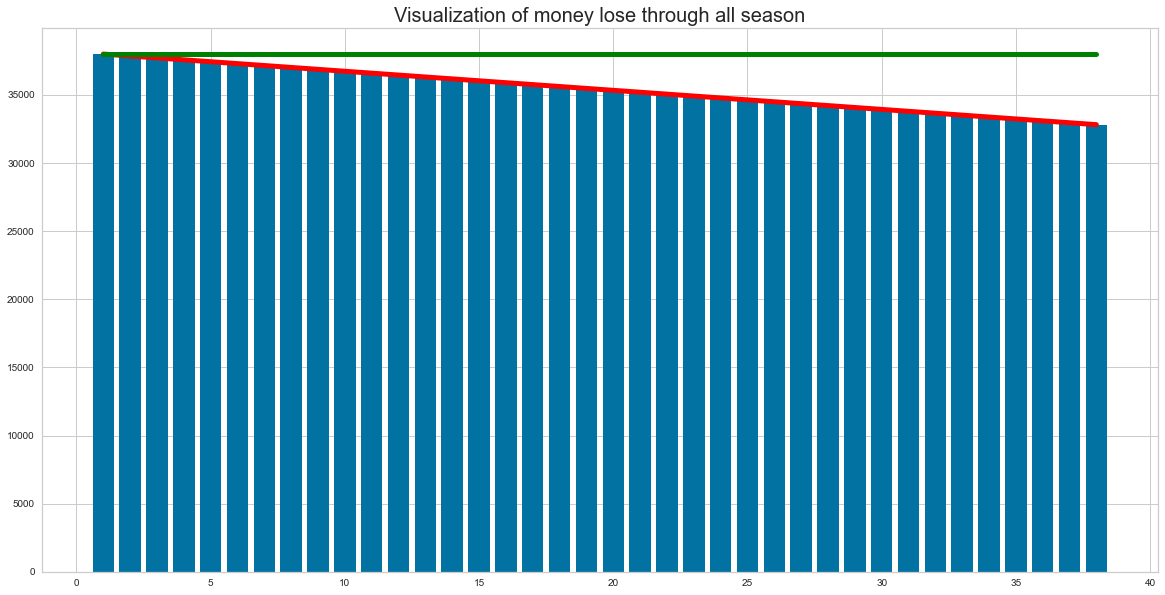

In [20]:
#visualization of lose of money through all season
x = list(range(1, 39))
y = list(range(38000, 32680, -140))
help_line = (38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000)
plt.figure(figsize=(20, 10))
plt.bar(x, y, width = 0.8)
plt.plot(x, y, color='red', linewidth=5)
plt.plot(x, help_line, color='green', linewidth=5)
plt.title("Visualization of money lose through all season", fontsize = 20)
plt.show()

### Result above mean that blind betting for under 2.5 goals in every match, will make you lose around 15% invested money

# Check blind betting for OVER 2.5 goals in every match

In [21]:
#create new column based on amount of goals, if there is a more than 2 goals, output is true, else false
df['over_2.5'] = df['total_goals'] >= 3
#bool values to numeric 
df['over_2.5'] = df['over_2.5'] * 1
#multiply odds with results to get matches with over 2 goals
df['odds_over'] = df['B365>2.5'] * df['over_2.5']
df.sample(3)

,HomeTeam,AwayTeam,FTHG,FTAG,B365>2.5,B365<2.5,total_goals,under_2.5,odds_under,over_2.5,odds_over
60,Sheffield United,Liverpool,0,1,1.61,2.30,1,1,2.30,0,0.00
234,Chelsea,Arsenal,2,2,1.72,2.10,4,0,0.00,1,1.72
78,Southampton,Chelsea,1,4,1.72,2.10,5,0,0.00,1,1.72


In [22]:
#mean value of bets, including 12% tax
print(df['odds_over'].mean() * 0.88)

0.7919536842105266


In [23]:
#mean value of bets, not including 12% tax
bets_over = df['odds_over'].mean()
bets_over

0.8999473684210529

# Summary:

If we would bet 100 PLN on each match for OVER 2.5 goals in match, we would lose app. 21%. If there would not be a tax, it would be just around 10%, so with correct choose of matches, there is a place for profit.

380 * 100 PLN = 38000 PLN
38000 * 0.79 = 30020 PLN

Lose = 7980 PLN

It give us a conclusion that it is better to bet for under 2.5 goals, as it is much closer to get

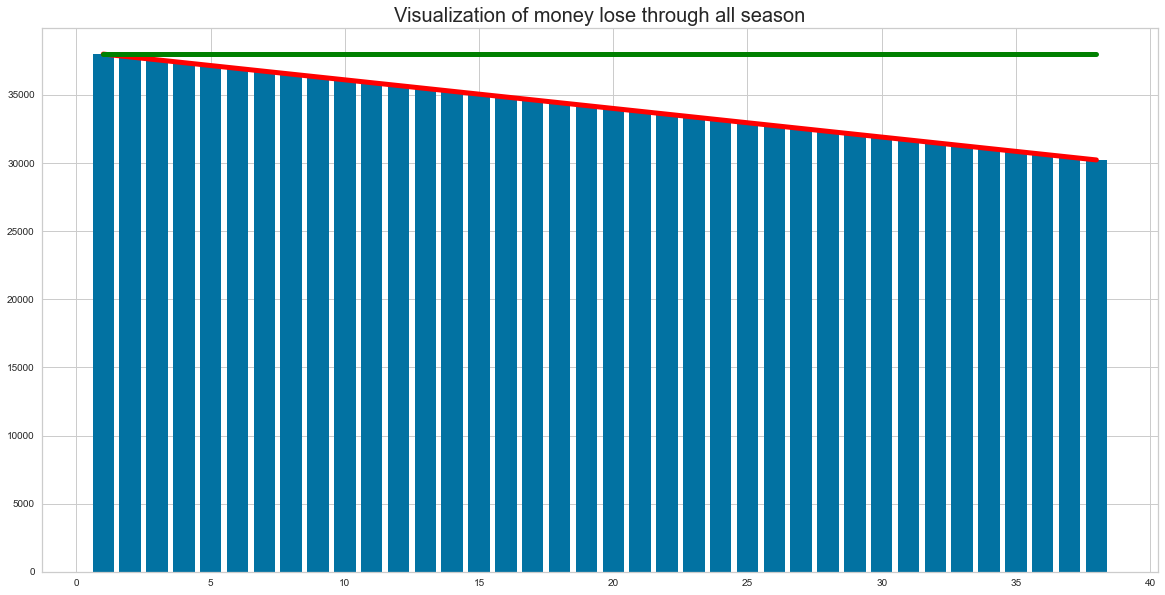

In [24]:
#visualization of lose of money through all season

x_over = list(range(1, 39))
y_over = list(range(38000, 30020, -210))
help_line = (38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000,38000)
plt.figure(figsize=(20, 10))
plt.title("Visualization of money lose through all season", fontsize = 20)
plt.bar(x_over, y_over, width = 0.8)
plt.plot(x_over, y_over, color='red', linewidth=5)
plt.plot(x_over, help_line, color='green', linewidth=5)
plt.show()

In [26]:
def chances(x):
    '''
    function calculates the mean of the bookmakers predictions if they were correct 
    '''
    mylist = []
    zx = pd.DataFrame()
    result_df = x[['HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A']]
    result_df.loc[result_df['FTR'] == 'D' , 'result_odd'] = result_df['B365D']
    result_df.loc[result_df['FTR'] == 'H' , 'result_odd'] = result_df['B365H']
    result_df.loc[result_df['FTR'] == 'A' , 'result_odd'] = result_df['B365A']
    result_df = result_df.rename(columns={"B365H": "D", "B365D": "H", "B365A": "A" })
    for i in range(5):
        z = result_df.sample(76)
        draw = z["D"]
        home = z["H"]
        away = z["A"]
        zx = pd.concat([draw,home,away],axis =1)
        zx = zx.idxmin(axis = 1)
        p = zx == z["FTR"]
        p = sum(p)
        p = p/76
        mylist.append(p)
    return mylist
bookmakers = chances(data)

In [27]:
bookmakers = pd.DataFrame(bookmakers)
bookmakers_mean = bookmakers.mean()
print(bookmakers_mean)

0   0.35
dtype: float64


If we were to trust bookmakers we would've made the right choice only around 35% times

In [28]:
data = pd.read_csv('E0.csv')
model = data[["HomeTeam", "AwayTeam","FTR", 
              "HTHG", "HTAG", "HTR", "HS", "AS", "HST", "AST", "HC", "AC", "HF", "AF",
              "HY", "AY", "AvgH", "AvgD", "AvgA","B365H","B365D","B365A"]]
model['HomeTeam'] = model['HomeTeam'].str.replace(" ","")
model['AwayTeam'] = model['AwayTeam'].str.replace(" ","")
features_to_factorize = model[['FTR', 'HTR', 'HomeTeam', 'AwayTeam']]
for feat in features_to_factorize:
    model[feat] = model[feat].factorize()[0]

data_y = model["FTR"]
data_x = model.drop(["FTR"], axis = 1)
LabelEncoder = preprocessing.LabelEncoder()
OrdinalEncoder = preprocessing.OrdinalEncoder()
data_y = LabelEncoder.fit_transform(data_y)
data_x = OrdinalEncoder.fit_transform(data_x)
data_x = StandardScaler().fit_transform(data_x)

Preparing data for modelling, loading data, picking proper columns, changing names, one hot encoding, Standard scaling and label/ordinal encoding

In [29]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    data_x, 
    data_y, 
    test_size = 0.2, 
    random_state=seed
)

Spliting data into Train/Test set. 80/20 proportion

In [30]:
cle = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = cle.fit(X_train, X_test, y_train, y_test)
print(predictions)

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["RandomForest"])
    if classifier_name == "RandomForest":
        n_estimators = trial.suggest_int('n_estimators', 2, 30)
        rf_max_depth = trial.suggest_int("rf_max_depth", 1, 32, log=True)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 30)
        min_samples_leaf = trial.suggest_int("max_samples_leaf", 1, 20)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=rf_max_depth,
            min_samples_split= min_samples_split,
            min_samples_leaf= min_samples_leaf,
        )
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    score = sklearn.model_selection.cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=kfold)
    accuracy = score.mean()
    return accuracy
#if __name__ == "__main__":
#    study = optuna.create_study(direction="maximize", sampler=RandomSampler(seed = 42))
#    study.optimize(objective, n_trials=100)
#    print(study.best_trial)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.57it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.70               0.62    None      0.68   
RandomForestClassifier             0.66               0.58    None      0.66   
NuSVC                              0.67               0.57    None      0.66   
QuadraticDiscriminantAnalysis      0.66               0.57    None      0.65   
BaggingClassifier                  0.64               0.57    None      0.64   
XGBClassifier                      0.62               0.56    None      0.63   
Perceptron                         0.66               0.56    None      0.64   
CalibratedClassifierCV             0.68               0.55    None      0.65   
LGBMClassifier                     0.62               0.55    None      0.62   
SGDClassifier                      0.61               0.55    None      0.62   
SVC                                0.63 

Checked the lazypredict for best model, chose the randomforest classifier so i did optuna to pull out best parameters

In [31]:
from statistics import mean, stdev
cross_validation = StratifiedKFold(n_splits=13, random_state = 42, shuffle = True)

clf = RandomForestClassifier(n_estimators = 14, 
                             max_depth = 24, 
                             min_samples_split = 11, 
                             min_samples_leaf = 8,
                             random_state = 42,
                             n_jobs = -1,) 
lst_accu_stratified = []

for train_index, test_index in cross_validation.split(data_x, data_y):
    x_train_fold, x_test_fold = data_x[train_index], data_x[test_index]
    y_train_fold, y_test_fold = data_y[train_index], data_y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')




Maximum Accuracy That can be obtained from this model is: 72.41379310344827 %

Minimum Accuracy: 41.37931034482759 %

Overall Accuracy: 59.4341290893015 %


Did cross validation, here are the metrics the model accuracy will be around 60%

Training model, random forest classifier, also checked gridsearch but optuna did better job.

In [32]:
clf = RandomForestClassifier(n_estimators = 14, 
                             max_depth = 24, 
                             min_samples_split = 11, 
                             min_samples_leaf = 8,
                             random_state = 42,
                             n_jobs = -1,) 
clf.fit(X_train,y_train)

print('Training set score: {:3.2%}'.format(clf.score(X_train, y_train)))
print('Test set score: {:3.2%}'.format(clf.score(X_test, y_test)))

Training set score: 75.99%
Test set score: 64.47%


Here is your model performance metrics, we can see that model did 76% well on training set, and around 64% on test set, i think its not overfitting, considering number of records im happy with this numbers.

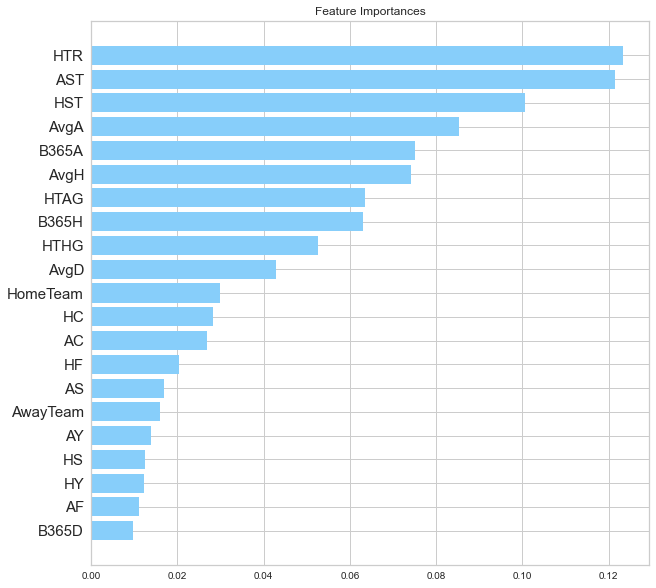

In [40]:
features = model.drop(["FTR"], axis = 1)
importances = clf.feature_importances_
indices = np.argsort(importances)
features = features.columns
plt.title('Feature Importances')
plt.grid(True)
plt.barh(range(len(indices)), importances[indices], color='#87CEFA', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], size=15)
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size': 20})
plt.show()

The most important features for model were: Half time away goals(HTAG), Away team shots(AS), Home team shots on target(HST), Market average away win odds(AvgA), HomeTeam.
They are pretty intuitive since they are also important in real life game and they determinate the score
The least important features were Away Team Yellow Cards(AY) and Home Team Red Cards(HR), even though that the model said that they are not important they contain informations which are crucial for model performance and correct classifications.

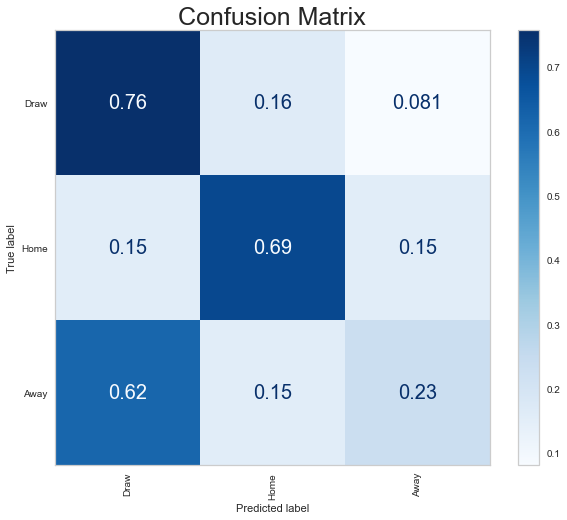

In [34]:
class_names = ["Draw","Home","Away"]
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid(False)
plt.title('Confusion Matrix', fontsize=25)
disp = plot_confusion_matrix(clf, X_test, y_test, 
                             display_labels=class_names, 
                             cmap=plt.cm.Blues, 
                             xticks_rotation='vertical',
                             ax=ax,
                             normalize = 'true',)

23% of aways were correctly classified, model 16% of time classified draw as a Home win.
Home and draws wins were classified around 73% of times correctly which is satisfying.
If we had more records, the "Away" predictions might be better since the model classified away win as draws which would bump the result up to around 65%.

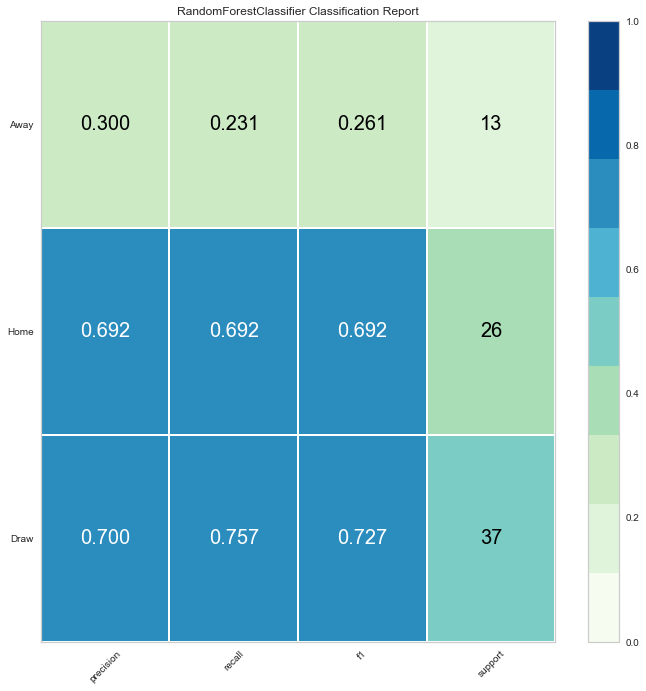

In [35]:
classes = ["Draw", "Home", "Away"]
visualizer = ClassificationReport(clf, classes=classes, support=True, cmap='GnBu')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plot2 = visualizer.show()

Classification raport also shows that the "aways" are main problem since their recall and f1 are so low. Which means that model preformance is low when it comes to classifying true positive in all relevant elements and classyifying true positives in chosen elements. F1 score contains recall and precision which makes this metric little bit better than recall. Overall model struggles with classifaying away wins and recognizes them almost equally 30%.

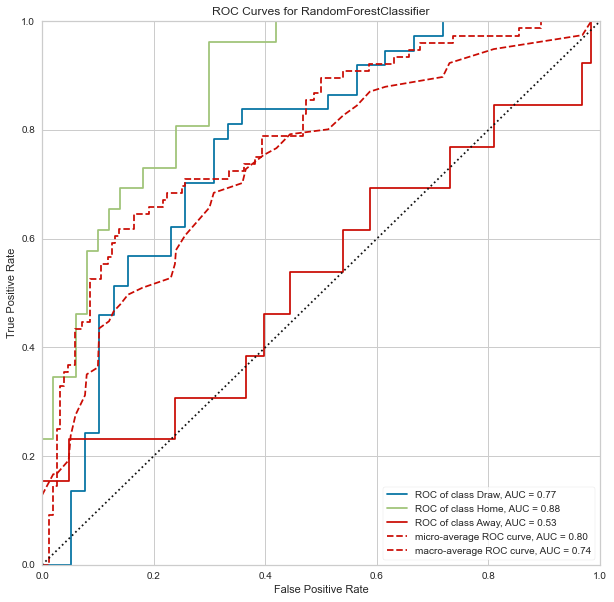

In [36]:
visualizer = ROCAUC(clf, classes=["Draw", "Home", "Away"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plot3 = visualizer.show()

AUC for home class is very high around 88% which means that the model will be able to distinguish between home winning and drawing the match. AUC for draw is also high 77%.
As we can see in the plot and by AUC score the away score is around 53% which is what makes our model worse, as I said the reason is amount of records in whole dataset

In [37]:
fnlprediction_proba = clf.predict_proba(X_test)
print('Roc_auc score: {:3.2%}'.format(roc_auc_score(y_test, fnlprediction_proba, multi_class="ovr")))

Roc_auc score: 72.73%


Overall AUC score is 72.73% which means that whole model has 72.73% chance to classify prediction correctly

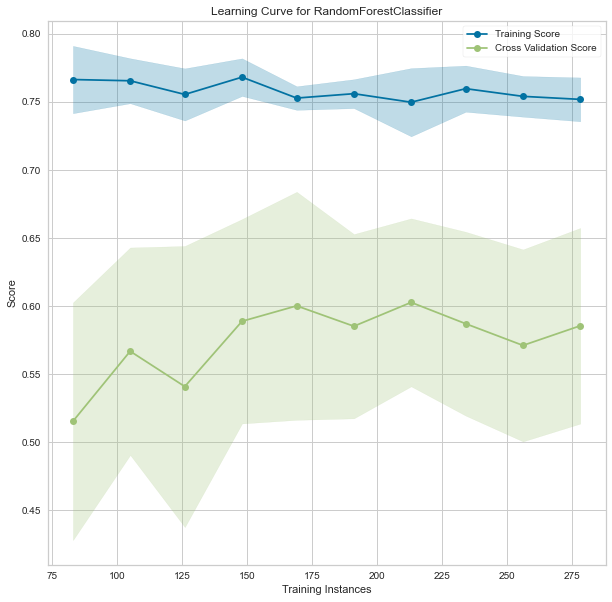

In [38]:
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    clf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=-1)
visualizer.fit(X_train, y_train)   
plot4 = visualizer.show() 

Learning Curve plot above says that the model have medium variance("green splash"),it also have low bias ("blue splash") it might lead to overfitting. Since train/test metrics are around 70% i think thats not the case. We can also see that the lines are not getting close to each other that means that the model probably requires more training examples in order to generalize more effectively. 

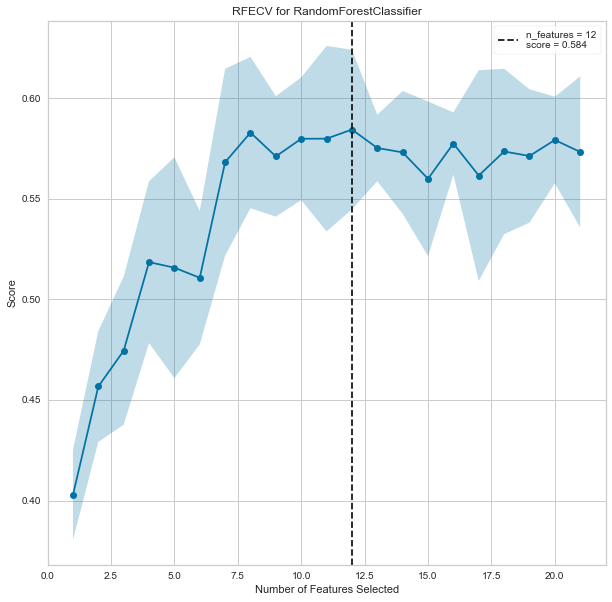

In [39]:
from yellowbrick.model_selection import RFECV
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(random_state = 42), cv=cv, scoring='f1_weighted')
visualizer.fit(X_train, y_train)        
plot5 = visualizer.show()

I did RFECV and decided to drop 2 non relevant columns, after this the RFECV plot says that after 12 features the performance is not getting better, but features importances says that even the other features do not improve the model itself they contain usefull information for model.